# This script contains the following points:

## PART 2

### 07. Profiling Instacart customers:
#### Age Variable
#### Income Variable
#### Family status and Dependants
#### Instacart Products

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Set path

path = r'C:\Users\nang6\OneDrive\Bureau\Data Analytics\Data Immersion\Achievement 4\02-2020 Instacart Basket Analysis'

In [6]:
# Import high_activity_customers

df_hcv = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

In [7]:
# Import departments

df_depts = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [8]:
# Check df_hcv info

df_hcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21678634 entries, 1 to 32404854
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       object  
 1   user_id                        object  
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float64 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   product_name                   object  
 10  aisle_id                       int8    
 11  department_id                  int8    
 12  prices                         float64 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest_day                    object  
 16  busiest_days                   object  
 17  busiest_period_of_day    

In [9]:
# Check df_depts info

df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# 07. Profiling Instacart customers

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles

# Age Variable

In [10]:
# Descriptive statistics of 'age' column

df_hcv['age'].describe()

count    2.167863e+07
mean     4.946596e+01
std      1.848724e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### Observation: Minimum age is 18 and Maximum age is 81, therefore we can create different age categories.

In [11]:
# Create age categories

df_hcv.loc[(df_hcv['age'] >= 18) & (df_hcv['age'] < 40), 'age_category'] = 'Young Adult'

In [12]:
df_hcv.loc[(df_hcv['age'] >= 40) & (df_hcv['age'] < 65), 'age_category'] = 'Middle Age'

In [13]:
df_hcv.loc[df_hcv['age'] >= 65, 'age_category'] = 'Senior'

In [14]:
# Check values

df_hcv['age_category'].value_counts(dropna = False)

Middle Age     8471425
Young Adult    7468625
Senior         5738584
Name: age_category, dtype: int64

### Create a crosstab with 'orders_day_of_week' and 'age_category' columns

In [15]:
crosstab_day_age = pd.crosstab(df_hcv['age_category'], df_hcv['orders_day_of_week'], dropna = False)

In [16]:
crosstab_day_age

orders_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Middle Age,1610126,1478085,1107687,1001788,991273,1103909,1178557
Senior,1096533,992577,745879,684919,668567,746800,803309
Young Adult,1429298,1318007,963994,883207,877687,974004,1022428


Text(0.5, 0, 'Age Category')

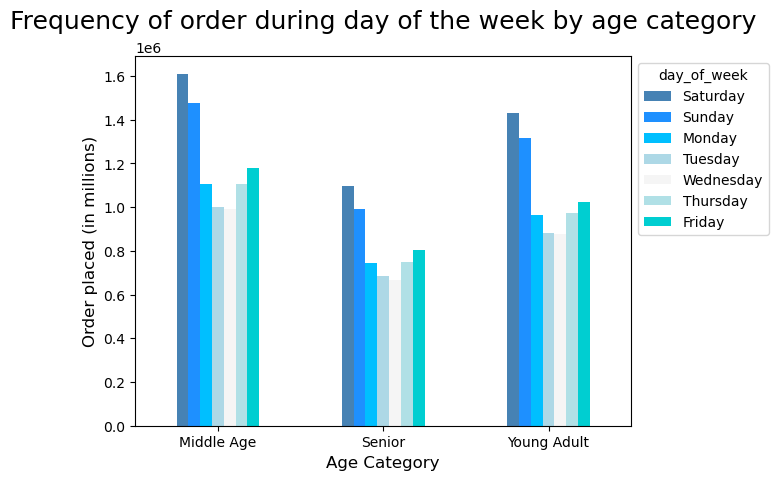

In [17]:
# Create a bar chart

bar_day_age = crosstab_day_age.plot.bar(rot = 0, color = ['steelblue', 'dodgerblue', 'deepskyblue', 'lightblue', 'whitesmoke', 'powderblue', 'darkturquoise'])

bar_day_age.legend(title = 'day_of_week', bbox_to_anchor = (1, 1), loc = 'upper left', labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.title('Frequency of order during day of the week by age category', fontsize = 18, pad = 20)
plt.ylabel('Order placed (in millions)', fontsize = 12)
plt.xlabel('Age Category', fontsize = 12)

#### Observation for all age categories: Busiest days are Saturday and Sunday. Slowest days are Tuesday and Wednesday.

In [18]:
# Export bar_day_age

bar_day_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week_&_age_category.png'), bbox_inches = 'tight')

# Income Variable

In [19]:
# Descriptive statistics of 'income' column

df_hcv.agg({ 'income' : ['mean', 'min', 'max']})

,income
mean,99671.200336
min,25903.000000
max,593901.000000


#### Observation: Lowest income is 25 900 and the Highest is 593 900 USD.

In [20]:
# Calculate income percentiles

quartile_income = list(df_hcv['income'].quantile([0.25, 0.5, 0.75]))

In [21]:
# Check outcome

quartile_income

[67285.0, 96756.0, 128086.0]

#### Observation: Based on the results, we can create income categories as follows: 
#### Low income:  < 70 000
#### Middle income: >= 70 000 and < 120 000
#### High income: >= 120 000

In [22]:
# Create income_flag

df_hcv.loc[df_hcv['income']< 70000, 'income_flag'] = 'Low'

In [23]:
df_hcv.loc[(df_hcv['income']>= 70000) & (df_hcv['income']< 120000), 'income_flag'] = 'Middle'

In [24]:
df_hcv.loc[df_hcv['income']>= 120000, 'income_flag'] = 'High'

In [25]:
# Check values

df_hcv['income_flag'].value_counts()

Middle    9285112
High      6426294
Low       5967228
Name: income_flag, dtype: int64

In [26]:
df_hcv.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_dependants,family_status,income,region,exclusion_flag,age_category,income_flag
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low


### Create a crosstab with  'income_flag' and 'region' columns

In [27]:
# Create Crosstab 

crosstab_income_region = pd.crosstab (df_hcv['region'],df_hcv['income_flag'], dropna = False)

In [28]:
crosstab_income_region

income_flag,High,Low,Middle
region,,,
Midwest,1532830,1382232,2168774
Northeast,1140578,1041982,1644006
South,2116340,1995874,3107176
West,1636546,1547140,2365156


Text(0.5, 0, 'Region')

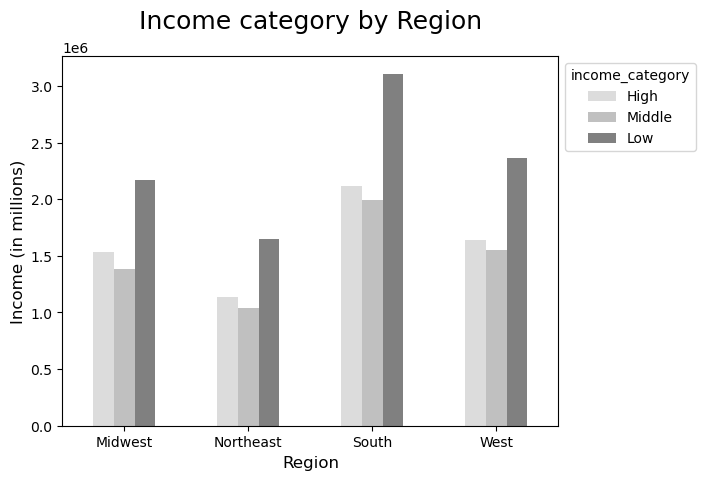

In [29]:
# Create a bar chart

bar_income_region = crosstab_income_region.plot.bar(rot = 0, color = ['gainsboro', 'silver', 'grey'])

bar_income_region.legend(title = 'income_category', bbox_to_anchor = (1, 1), loc = 'upper left', labels = ['High', 'Middle', 'Low'])

plt.title('Income category by Region', fontsize = 18, pad = 20)
plt.ylabel('Income (in millions)', fontsize = 12)
plt.xlabel('Region', fontsize = 12)

#### Observation: Accros all regions, most Instacartcustomers are from low income category.

In [30]:
# Export

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'), bbox_inches = 'tight')

# Family status and Dependants

In [31]:
# Check 'number_dependants' values

df_hcv['number_dependants'].value_counts().sort_index()

0    5418042
1    5403418
2    5415446
3    5441728
Name: number_dependants, dtype: int64

In [32]:
# Create a new column 'dependants_flag' to check whether dependants are present or not

df_hcv.loc[df_hcv['number_dependants'] >= 1, 'dependants_flag'] = 'with dependants'

In [33]:
df_hcv.loc[df_hcv['number_dependants'] < 1, 'dependants_flag'] = 'no dependants'

In [34]:
# Check values 

df_hcv['dependants_flag'].value_counts(dropna = False)

with dependants    16260592
no dependants       5418042
Name: dependants_flag, dtype: int64

### Create a crosstab with 'family_status' and 'dependants_flag' columns¶

In [35]:
crosstab_family = pd.crosstab(df_hcv['family_status'],df_hcv['dependants_flag'],dropna = False)

In [36]:
crosstab_family

dependants_flag,no dependants,with dependants
family_status,,
divorced/widowed,1851520,0
living with parents and siblings,0,1037368
married,0,15223224
single,3566522,0


#### Observation: As dependant is not specified in this case, it could be children, relatives, animals, etc.

#### Family with dependants = are married couple and family living with parents and siblings.
#### Family without dependants = divorced/widowed and singles.

In [37]:
# Create a new 'household' column based on 'family_statuts' and ' income_flag'

df_hcv.loc[(df_hcv['family_status'] == 'divorced/widowed') | (df_hcv['family_status'] == 'single') & (df_hcv['income_flag'] == 'High'), 'household'] = 'One person no dependants-High'

In [38]:
df_hcv.loc[(df_hcv['family_status'] == 'divorced/widowed') | (df_hcv['family_status'] == 'single') & (df_hcv['income_flag'] == 'Middle'), 'household'] = 'One person no dependants-Middle'

In [39]:
df_hcv.loc[(df_hcv['family_status'] == 'divorced/widowed') | (df_hcv['family_status'] == 'single') & (df_hcv['income_flag'] == 'Low'), 'household'] = 'One person no dependants-Low'

In [40]:
df_hcv.loc[(df_hcv['family_status'] == 'living with parents and siblings') & (df_hcv['income_flag'] == 'High'), 'household'] = 'Family with dependants-High'

In [41]:
df_hcv.loc[(df_hcv['family_status'] == 'living with parents and siblings') & (df_hcv['income_flag'] == 'Middle'), 'household'] = 'Family with dependants-Middle'

In [42]:
df_hcv.loc[(df_hcv['family_status'] == 'living with parents and siblings') & (df_hcv['income_flag'] == 'Low'), 'household'] = 'Family with dependants-Low'

In [43]:
df_hcv.loc[(df_hcv['family_status'] == 'married') & (df_hcv['income_flag'] == 'High'), 'household'] = 'Family no dependants-High'

In [44]:
df_hcv.loc[(df_hcv['family_status'] == 'married') & (df_hcv['income_flag'] == 'Middle'), 'household'] = 'Family no dependants-Middle'

In [45]:
df_hcv.loc[(df_hcv['family_status'] == 'married') & (df_hcv['income_flag'] == 'Low'), 'household'] = 'Family no dependants-Low'

In [46]:
df_hcv['household'].value_counts(dropna = False)

Family no dependants-Middle        6478241
Family no dependants-High          4789912
Family no dependants-Low           3955071
One person no dependants-Low       3097782
One person no dependants-Middle    1545269
One person no dependants-High       774991
Family with dependants-Low          519186
Family with dependants-Middle       505343
Family with dependants-High          12839
Name: household, dtype: int64

In [47]:
df_hcv.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_dependants,family_status,income,region,exclusion_flag,age_category,income_flag,dependants_flag,household
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low


### Create crosstab with 'household' and 'age_category' columns¶

In [48]:
crosstab_household_age = pd.crosstab(df_hcv['household'],df_hcv['age_category'],dropna = False)

In [49]:
crosstab_household_age 

age_category,Middle Age,Senior,Young Adult
household,,,
Family no dependants-High,2773953,1958115,57844
Family no dependants-Low,983545,601500,2370026
Family no dependants-Middle,2574901,1763189,2140151
Family with dependants-High,0,0,12839
Family with dependants-Low,0,0,519186
Family with dependants-Middle,0,0,505343
One person no dependants-High,754478,0,20513
One person no dependants-Low,702463,1415780,979539
One person no dependants-Middle,682085,0,863184


Text(0.5, 0, 'Customer (in millions)')

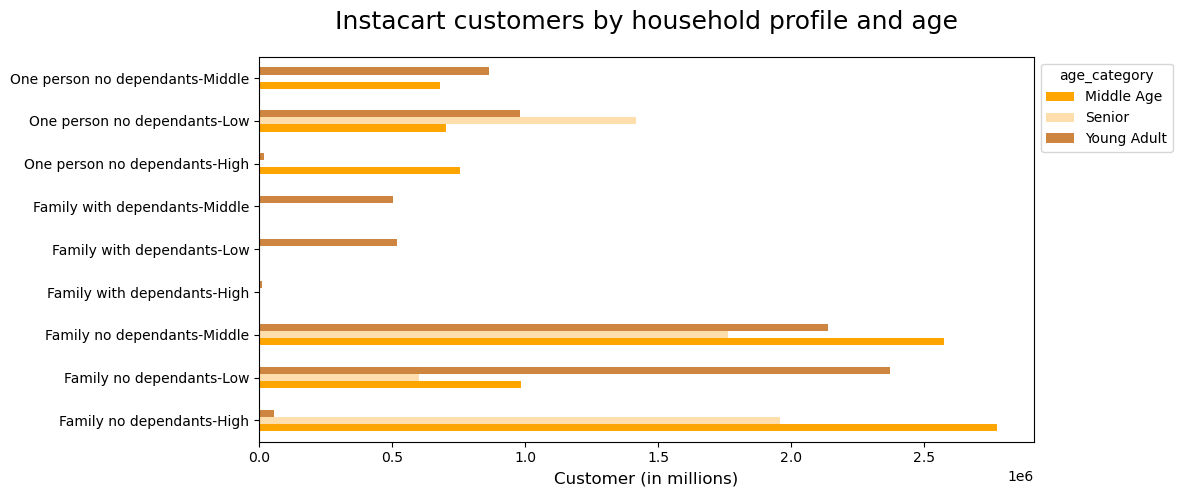

In [51]:
# Create a bar chart

bar_household_age = crosstab_household_age.plot.barh(rot = 0, color = ['orange', 'navajowhite', 'peru'], figsize = (10,5))

bar_household_age.legend(title = 'age_category', bbox_to_anchor = (1, 1), loc = 'upper left', labels = ['Middle Age', 'Senior', 'Young Adult'])

plt.title('Instacart customers by household profile and age', fontsize = 18, pad = 20)
plt.ylabel('')
plt.xlabel('Customer (in millions)', fontsize = 12)

#### Observation: Middle age group from family without dependants - High and Middle income household are strongly present customers, following by Young adult age group from family without dependants - Middle and Low income household.

In [52]:
# Export 

bar_household_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_household_age2.png'), bbox_inches = 'tight') 

# Instacart Products

In [53]:
# Create department dictionary

dept_map = dict(zip(df_depts['department_id'], df_depts['department']))

In [54]:
dept_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [55]:
df_hcv['department'] = df_hcv['department_id'].map(dept_map)

In [56]:
# Check values

df_hcv['department'].value_counts()

produce            6356254
dairy eggs         3625897
snacks             1937577
beverages          1800090
frozen             1486420
pantry             1247429
bakery              784789
canned goods        708767
deli                702359
dry goods pasta     574998
household           489476
meat seafood        472058
breakfast           469608
personal care       297385
babies              287019
international       179413
alcohol             101166
pets                 65167
missing              45388
other                23971
bulk                 23403
Name: department, dtype: int64

In [57]:
df_hcv.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_dependants,family_status,income,region,exclusion_flag,age_category,income_flag,dependants_flag,household,department
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,3,married,40423,South,High activity,Young Adult,Low,with dependants,Family no dependants-Low,beverages


### Alcohol Consumer vs. Non-Alcohol Consumer

In [58]:
# Create a new 'alcohol_consumer' column

df_hcv.loc[df_hcv['department'] !='alcohol', 'alcohol_consumer'] = 'No'

In [59]:
df_hcv.loc[df_hcv['department'] =='alcohol', 'alcohol_consumer'] = 'Yes'

In [60]:
# Check values

df_hcv['alcohol_consumer'].value_counts(dropna = False)

No     21577468
Yes      101166
Name: alcohol_consumer, dtype: int64

Text(0.5, 1.0, 'Pourcentage of Instacart customer of alcohol consumer')

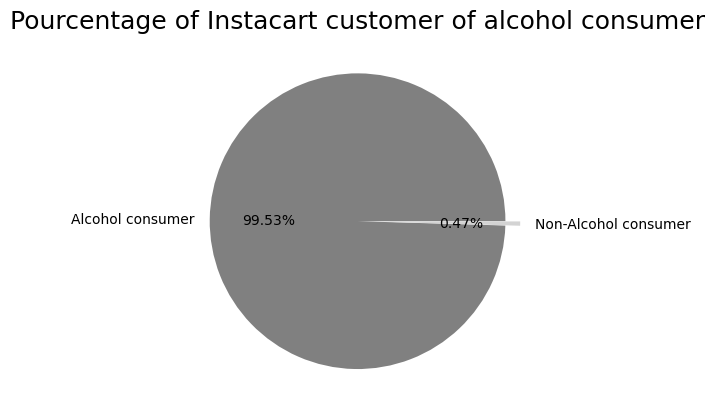

In [61]:
# Create a pie chart 

pie_alcohol_consumer = df_hcv['alcohol_consumer'].value_counts().plot.pie(labels = ['Alcohol consumer','Non-Alcohol consumer'], autopct=('%.2f%%'), colors = ['grey', 'lightgrey'], label = '', explode = [0,0.1])

plt.title('Pourcentage of Instacart customer of alcohol consumer', fontsize = '18')

#### Observation: the pourcentage of customer whom consumes alcohol is higher than the non-consumer one.

In [62]:
# Export 

pie_alcohol_consumer.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_alcohol_consumer.png'),bbox_inches = 'tight')

### Sweet Tooth vs. Non-Sweet Tooth

In [63]:
# Create a new 'bakery_consumer' column

df_hcv.loc[df_hcv['department'] !='bakery', 'bakery_consumer'] = 'No'

In [64]:
df_hcv.loc[df_hcv['department'] =='bakery', 'bakery_consumer'] = 'Yes'

In [65]:
# Check values

df_hcv['bakery_consumer'].value_counts(dropna = False)

No     20893845
Yes      784789
Name: bakery_consumer, dtype: int64

Text(0.5, 1.0, 'Pourcentage of Instacart customer of bakery consumer')

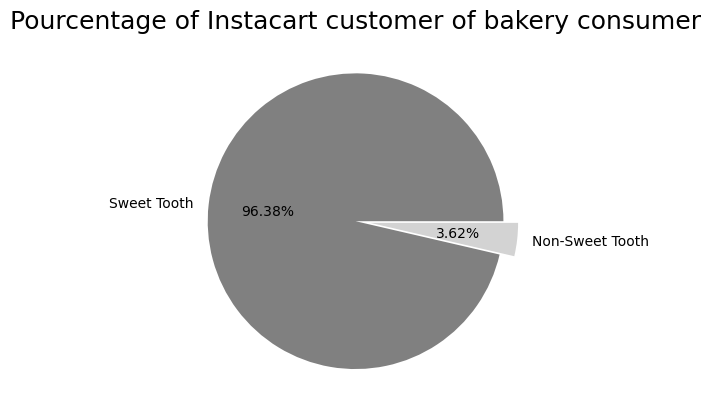

In [66]:
# Create a pie chart 

pie_bakery_consumer = df_hcv['bakery_consumer'].value_counts().plot.pie(labels = ['Sweet Tooth','Non-Sweet Tooth'], autopct=('%.2f%%'), colors = ['grey', 'lightgrey'], label = '', explode = [0,0.1])

plt.title('Pourcentage of Instacart customer of bakery consumer', fontsize = '18')

#### Observation: Instacart customers like sweet treets! 

In [67]:
# Export 

pie_bakery_consumer.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_bakery_consumer.png'),bbox_inches = 'tight')

### Frequency of order per hour

Text(0.5, 0, 'order_hour_of_day')

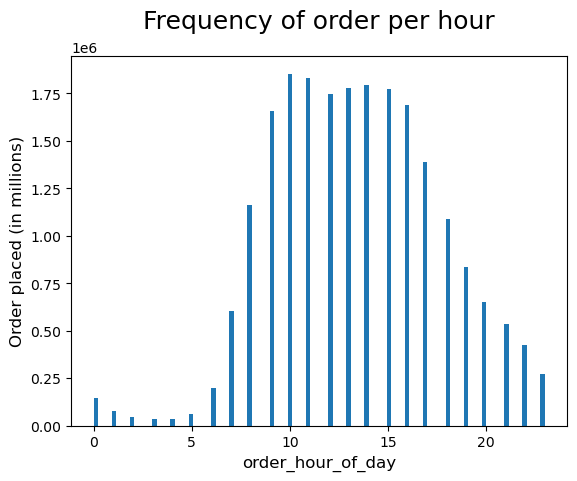

In [68]:
# Create an histogram of the 'order_hour_of_day' column

hist2_order_hour_of_day = df_hcv['order_hour_of_day'].plot.hist(bins = 100)

plt.title('Frequency of order per hour', fontsize = 18, pad = 20)
plt.ylabel('Order placed (in millions)', fontsize = 12)
plt.xlabel('order_hour_of_day', fontsize = 12)

#### Observation: Orders start to increase after 5:00am reaching the highest frequency at 10:00am, it remains high from 10:00am to 3:00pm, then we can start to see a slight decrease in order from there.¶

In [69]:
# Export hist_order_hour_of_day

hist2_order_hour_of_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'hist2_order_hour_of_day.png'))

### Early Birds vs. Night Owls

In [70]:
# Check the frequency values of 'order_hour_of_day' column

df_hcv['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      145486
1       76948
2       46414
3       34189
4       35638
5       59167
6      196698
7      604711
8     1161010
9     1655754
10    1854761
11    1830478
12    1748000
13    1778013
14    1796613
15    1775282
16    1690388
17    1386699
18    1086028
19     835464
20     652130
21     534106
22     425015
23     269642
Name: order_hour_of_day, dtype: int64

In [71]:
# Create a list for a new 'order_time_day' column

result = []

for hour in df_hcv['order_hour_of_day']:
    if hour in [0, 1, 2, 3, 4, 21, 22, 23]:
        result.append('Night owl')
    elif hour in [5, 6, 7, 8]:
        result.append('Early bird')
    else:
        result.append('Regular')

In [72]:
# Insert the result to the new column 

df_hcv['order_time_period'] = result

In [73]:
# Check values

df_hcv['order_time_period'].value_counts(dropna = False)

Regular       18089610
Early bird     2021586
Night owl      1567438
Name: order_time_period, dtype: int64

In [74]:
df_hcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21678634 entries, 1 to 32404854
Data columns (total 41 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       object  
 1   user_id                        object  
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float64 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   product_name                   object  
 10  aisle_id                       int8    
 11  department_id                  int8    
 12  prices                         float64 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest_day                    object  
 16  busiest_days                   object  
 17  busiest_period_of_day    

### Create a crosstab with 'age_group' and 'order_time_period'

In [75]:
crosstab_age_time = pd.crosstab(df_hcv['age_category'], df_hcv['order_time_period'], dropna = False)

In [76]:
crosstab_age_time

order_time_period,Early bird,Night owl,Regular
age_category,,,
Middle Age,787970,609553,7073902
Senior,540832,416033,4781719
Young Adult,692784,541852,6233989


Text(0.5, 0, 'Age Category')

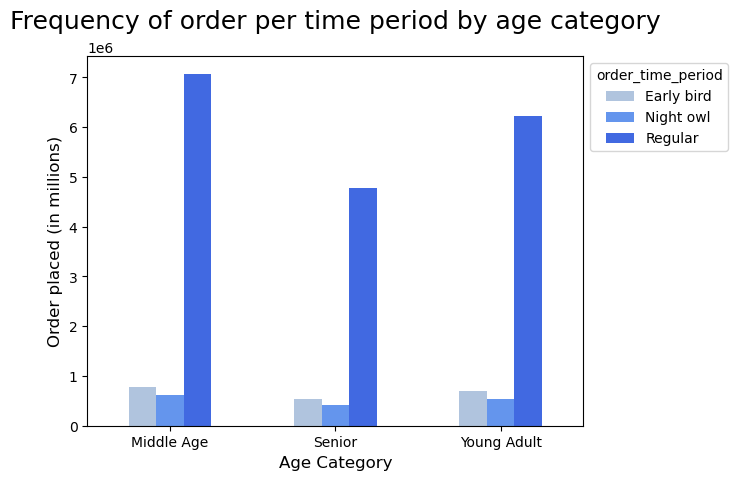

In [77]:
# Create a bar chart

bar_age_time = crosstab_age_time.plot.bar(rot = 0, color = ['lightsteelblue', 'cornflowerblue', 'royalblue'])

bar_age_time.legend(title = 'order_time_period', bbox_to_anchor = (1, 1), loc = 'upper left', labels = ['Early bird', 'Night owl', 'Regular'])

plt.title('Frequency of order per time period by age category', fontsize = 18, pad = 20)
plt.ylabel('Order placed (in millions)', fontsize = 12)
plt.xlabel('Age Category', fontsize = 12)

#### Observation: Regular hours, 9 to 20 are when all age category like to place orders.

In [78]:
# Export 

bar_age_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_age_time.png'),bbox_inches = 'tight')

In [79]:
# Export df_hcv

df_hcv.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final.pkl'))                              